In [ ]:
#№5: Деплой и мониторинг LLM-приложения

Теоретическая: Понять принципы CI/CD (Continuous Integration/Continuous Deployment) и важность мониторинга в продакшене.

Практическая: Настроить автоматический пайплайн деплоя в Yandex Cloud и добавить в приложение инструменты для наблюдения за его работой.


Обьяснение: при обновлении кода в git (которая была клонирована в sourcecraft)автоматически образы должны пересобраться, а также обновиться версия в Serverless Containers

(Опционально) Запускается smoke-тест — проверяет, что контейнер запускается

(Опционально) Сканируется образ на уязвимости с помощью Trivy


##Настройка CI/CD-пайплайна

1 Переходим в sourcecraft

2 Нажимаем импорт репозитория

3 Пишем название и токен досупа к git

4 включаем синхронизацию с веткой проекта
при включении синхронизации на ветку накладываются политики доступа запрещающие редактировать ветку в sourcecraft и все изменения вносятся через git

Написать конфигурацию для Yandex Cloud CI/CD, пример создания

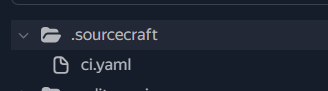

Тестирование: (Опционально) Запускать базовые smoke-тесты (например, проверять, что контейнер запускается).

Сканирование: (Опционально, продвинутый уровень) Интегрировать сканирование образа на уязвимости (Trivy).

Деплой: Автоматически обновлять версию в Serverless Containers, используя новый образ.


Создание yaml файла:
1) пишем событие триггер: push ветки или pull request
https://sourcecraft.dev/portal/docs/ru/sourcecraft/ci-cd-ref/on

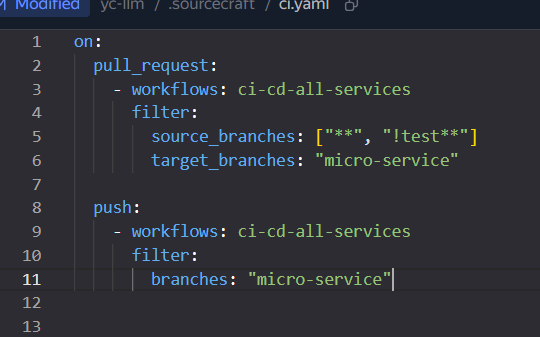

в зависимости от тригера код автоматически запустится в разделе CI\CD

При запуске тригера начинают выполнятся процессы workflows
https://sourcecraft.dev/portal/docs/ru/sourcecraft/ci-cd-ref/workflows

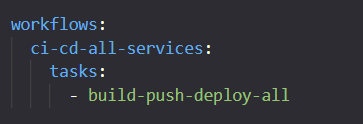

в процессах выполняются задания - tasks
https://sourcecraft.dev/portal/docs/ru/sourcecraft/ci-cd-ref/tasks

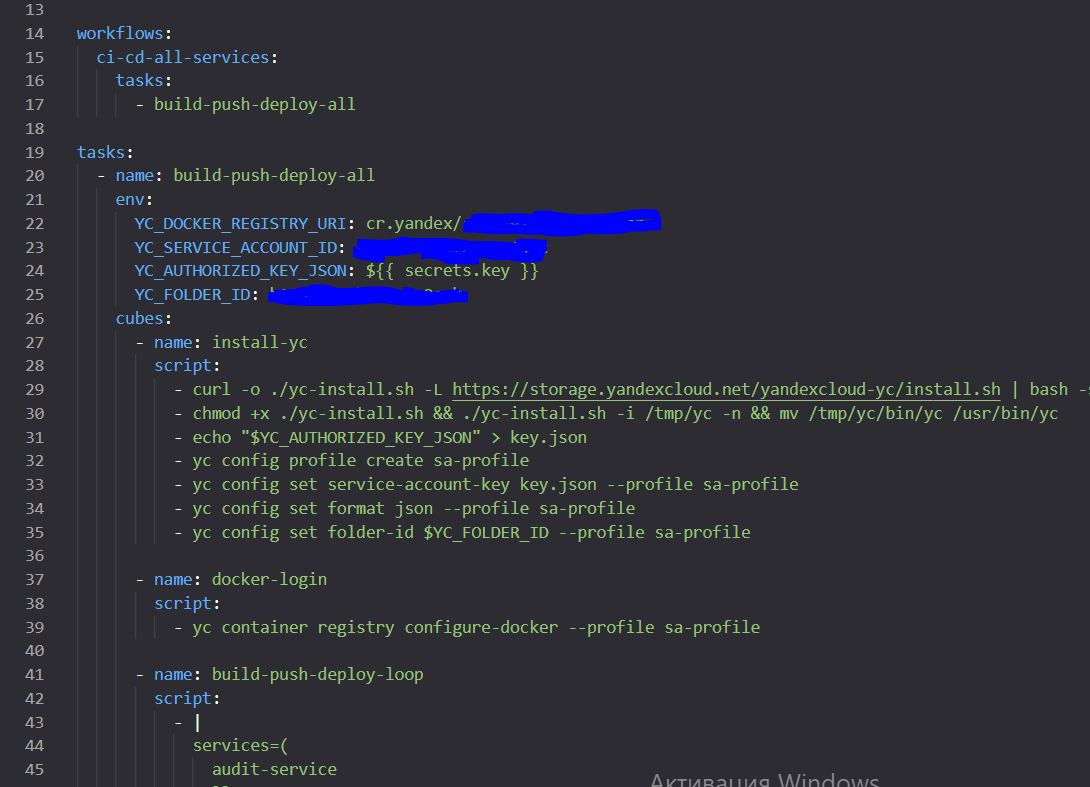

в заданиях указываются используемые переменные окружения и кубики пайплайна - разделенные блоки команд для опредленного действия, на картинке показано как это выглядит в программе
https://sourcecraft.dev/portal/docs/ru/sourcecraft/ci-cd-ref/cubes
в кубитах пишутся имя и выполняемый скрипт

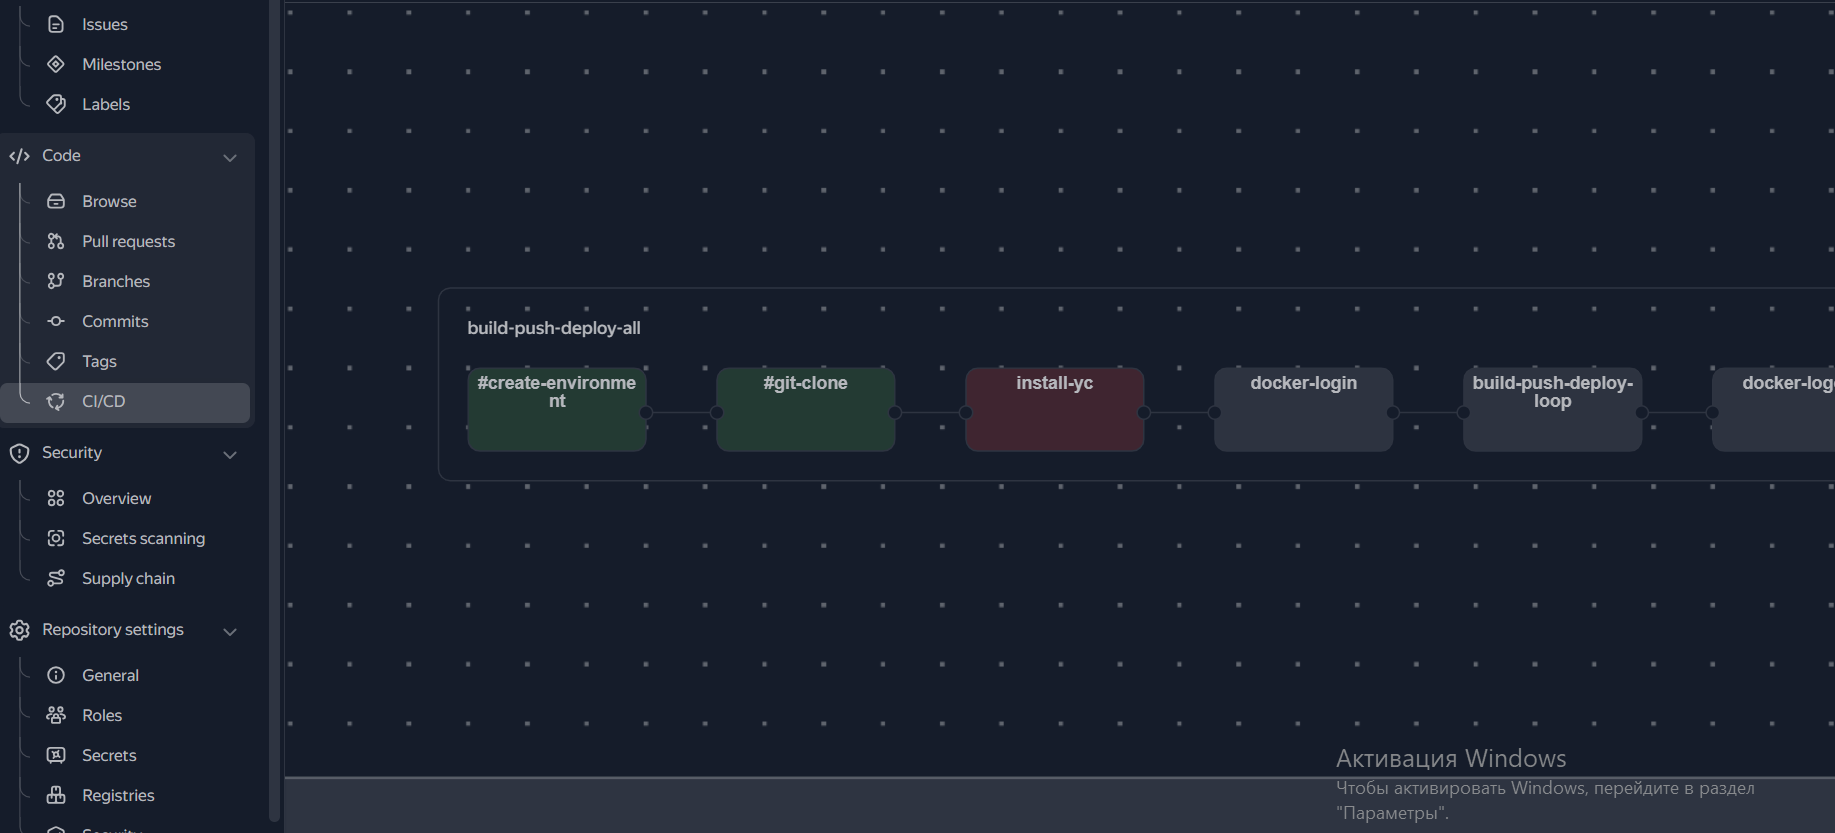

зеленым отмечены успешно выполненные, а красным неудачные. Ошибки показываются при нажатии на кубик

Итого в yaml файле должны быть реализованы следующие кубиты:
1) загрузка ssh ключей в секреты
2) подключение к вм
3) билдинг и пуш докер контейнеров как из практики 4

Переменные окружения хранятся в Secrets

Демонтарция - live coding